Setup Environment in Colab

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Load COVID-19 Dataset

In [2]:
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
df = pd.read_csv(url)

# Show first 5 rows
df.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


Check Dataset Info

In [3]:
df.info()
df.describe()
df.columns  # to view all columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

Filter for a Specific Country (e.g., India)

In [4]:
india_df = df[df['location'] == 'India']
india_df = india_df[['date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths']]
india_df['date'] = pd.to_datetime(india_df['date'])
india_df.tail()


,date,total_cases,new_cases,total_deaths,new_deaths
175226,2024-08-08,NaN,NaN,NaN,NaN
175227,2024-08-09,NaN,NaN,NaN,NaN
175228,2024-08-10,NaN,NaN,NaN,NaN
175229,2024-08-11,NaN,NaN,NaN,NaN
175230,2024-08-12,NaN,NaN,NaN,NaN


Plotting Total Cases and Deaths Over Time

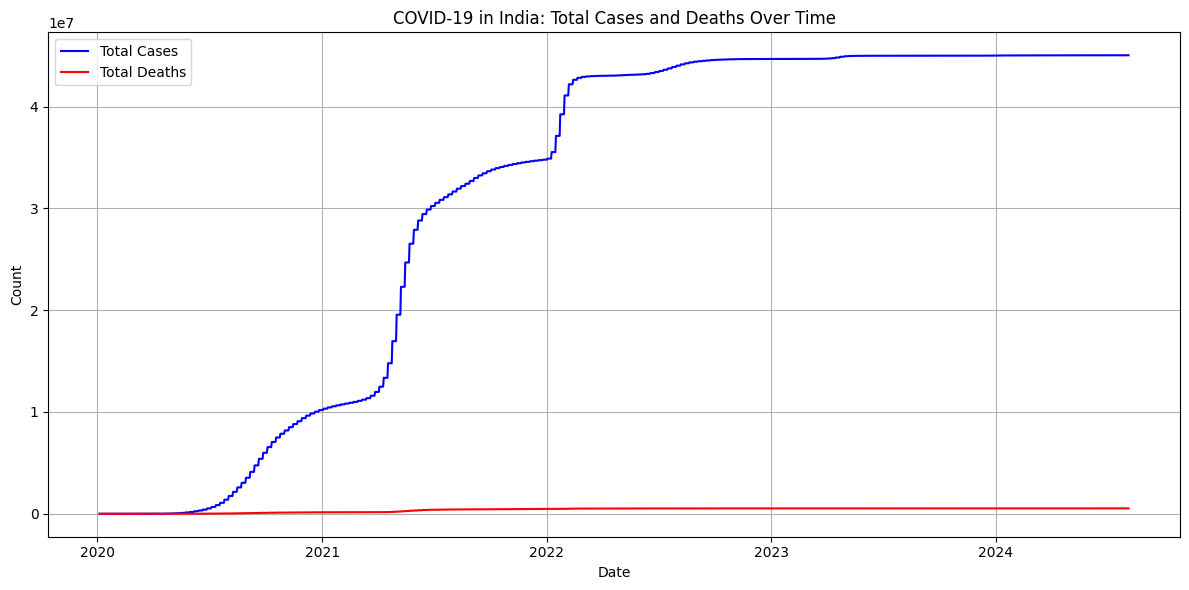

In [5]:
plt.figure(figsize=(12,6))
plt.plot(india_df['date'], india_df['total_cases'], label='Total Cases', color='blue')
plt.plot(india_df['date'], india_df['total_deaths'], label='Total Deaths', color='red')
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("COVID-19 in India: Total Cases and Deaths Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Daily New Cases Plot

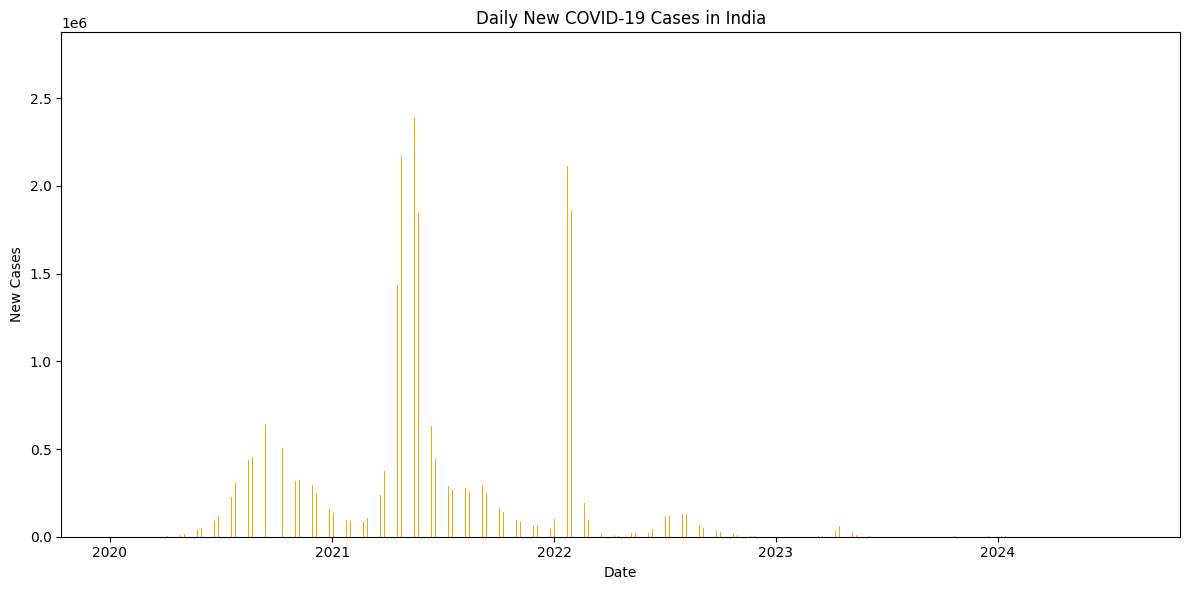

In [6]:
plt.figure(figsize=(12,6))
plt.bar(india_df['date'], india_df['new_cases'], color='orange')
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.title("Daily New COVID-19 Cases in India")
plt.tight_layout()
plt.show()


Optional – Comparison of Multiple Countries

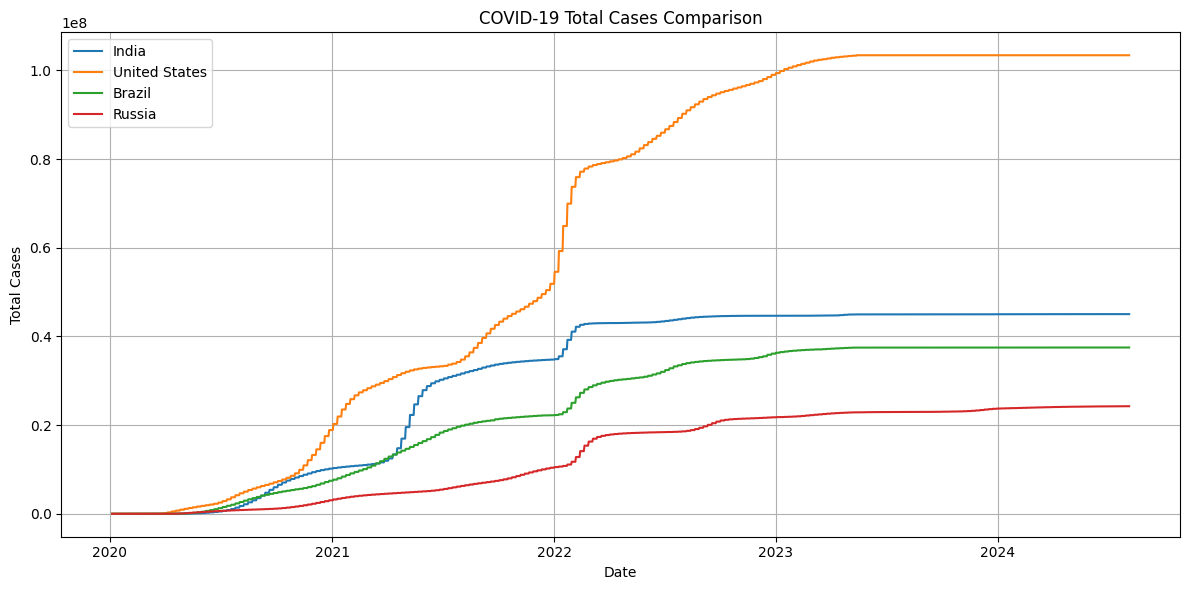

In [7]:
countries = ['India', 'United States', 'Brazil', 'Russia']
filtered_df = df[df['location'].isin(countries)]
filtered_df = filtered_df[['location', 'date', 'total_cases']]
filtered_df['date'] = pd.to_datetime(filtered_df['date'])

plt.figure(figsize=(12,6))
for country in countries:
    country_data = filtered_df[filtered_df['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.title("COVID-19 Total Cases Comparison")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Save Your Visualizations

In [8]:
plt.savefig('india_total_cases.png')


<Figure size 640x480 with 0 Axes>